## Matplotlib 2

#### Udemy course:
- [Data Visualization in Python (Mplib, Seaborn, Plotly, Dash)](https://www.udemy.com/course/data-visualization-in-python/)

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

## The Iris dataset

In [2]:
import sklearn.datasets as ds

In [3]:
iris = ds.load_iris()
#iris
iris_x = iris['data']
iris_y = iris['target']
iris_x_labels = iris['feature_names']
iris_y_labels = iris['target_names']
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [17]:
setosa = np.where(iris_y == 0)
versicolor = np.where(iris_y == 1)
virginica = np.where(iris_y == 2)
#iris_y.size
#setosa

#iris_x[:, 0]

### How many records do we have of each class?

([<matplotlib.patches.Wedge at 0x1c023efd910>,
 [Text(0.5749999689181257, 0.9959292322972324, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.324999982431984, 0.5629165226027835, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

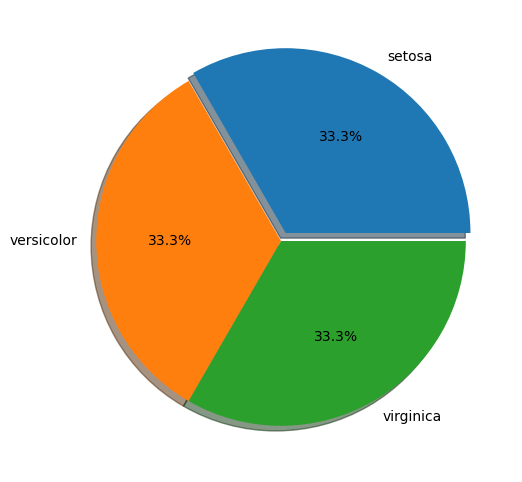

In [5]:
(unique, counts) = np.unique(iris_y, return_counts=True)
#counts

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=iris_y_labels, autopct='%1.1f%%', shadow=True, explode=(0.05, 0, 0))

Text(0.5, 1.0, 'Class distribution of iris data points')

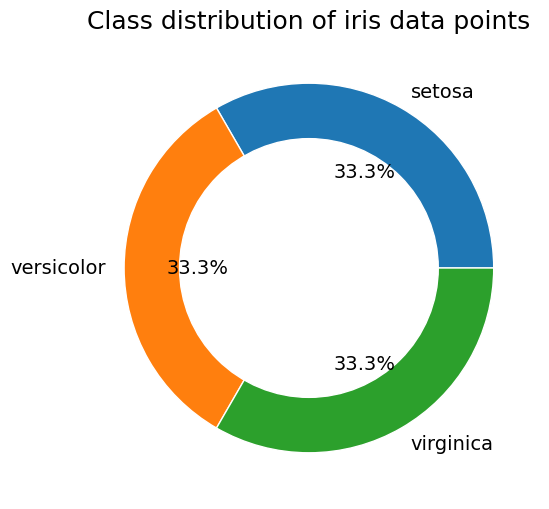

In [6]:
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=iris_y_labels, autopct='%1.1f%%', textprops={'fontsize': 14},
        wedgeprops={'edgecolor': '#ffffff'})

circle = plt.Circle(xy=(0, 0), radius=0.7, color='white')
plt.gca().add_artist(circle)
plt.title('Class distribution of iris data points', size=18)

### Can we tell apart iris flowers by their petals?

In [7]:
formatter = FuncFormatter(lambda v, _: iris_y_labels[v])

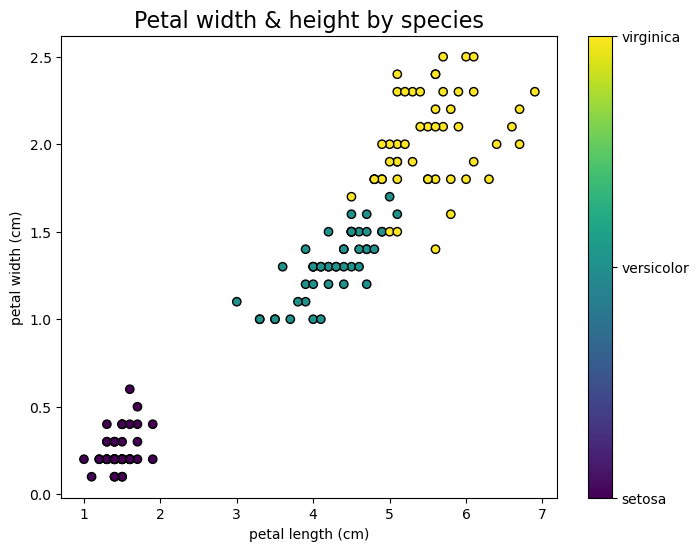

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(iris_x[:, 2], iris_x[:, 3], c=iris_y, edgecolors='k')
plt.xlabel(iris_x_labels[2])
plt.ylabel(iris_x_labels[3])
plt.title("Petal width & height by species", size=16)

plt.colorbar(ticks=[0, 1, 2], format=formatter)

### Does sepal length help?

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [29]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-160, azim=130)

ax.set_xlabel(iris_x_labels[2])
ax.set_ylabel(iris_x_labels[3])
ax.set_zlabel(iris_x_labels[0])

scatter = ax.scatter(iris_x[:, 2], iris_x[:, 3], iris_x[:, 0], edgecolor='k', c=iris_y, s=40)

handles, _ = scatter.legend_elements()

legend = ax.legend(handles, iris_y_labels, loc="upper left", title="Species")
ax.add_artist(legend)

#plt.show()

<Figure size 800x600 with 0 Axes>

### What is the range of values for sepal/petal width/length?

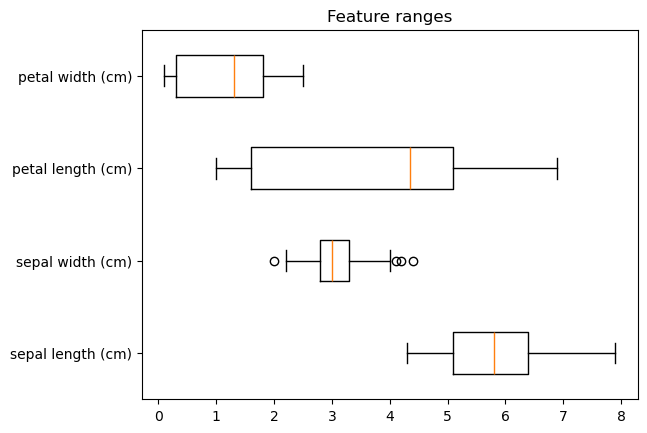

In [31]:
plt.boxplot(iris_x, labels=iris_x_labels, vert=False)
plt.title("Feature ranges")
plt.show()

### How are feature values distributed?

In [44]:
q1, median, q3 = np.percentile(iris_x, [25, 50, 75], axis=0)
q1

array([5.1, 2.8, 1.6, 0.3])

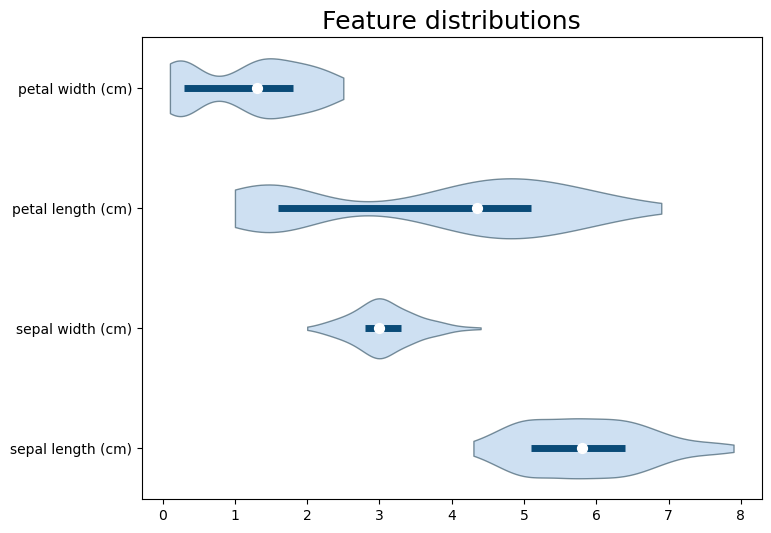

In [97]:
plt.figure(figsize=(8, 6))

parts = plt.violinplot(iris_x, showextrema=False, vert=False)

for pc in parts["bodies"]:
    pc.set_facecolor("#9ec2e6")
    pc.set_edgecolor("#01263a")
    pc.set_alpha(.5)

plt.title("Feature distributions", size=18)
plt.yticks([1, 2, 3, 4], iris_x_labels)

ax = plt.gca()
ax.scatter(median, [1, 2, 3, 4], color="white", s=50, zorder=3)
ax.hlines([1, 2, 3, 4], q1, q3, color="#0a4b78", lw=5)

plt.show()

### What is the average feature value per species?

In [37]:
setosa_means = iris_x[setosa].mean(axis=0)
virginica_means = iris_x[virginica].mean(axis=0)
versicolor_means = iris_x[versicolor].mean(axis=0)
setosa_means

array([5.006, 3.428, 1.462, 0.246])

In [38]:
cmap = plt.cm.magma
color = [cmap(0.2), cmap(0.5), cmap(0.8)]

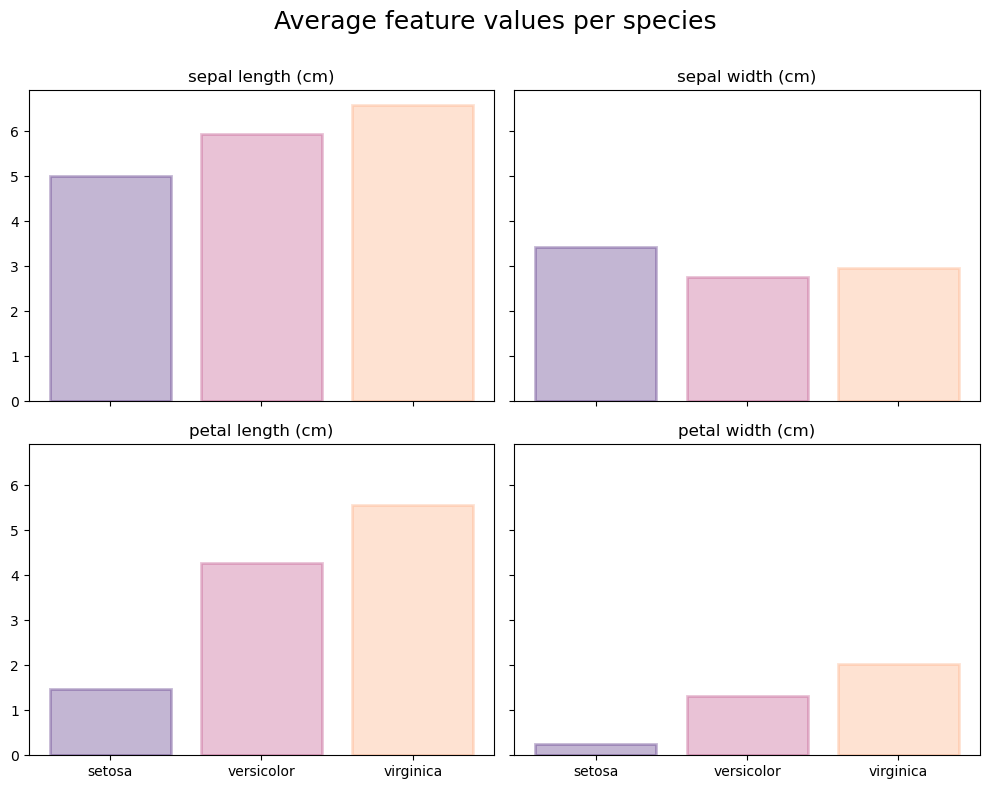

In [96]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 8))

for i, lab in enumerate(iris_x_labels):
    ax = axes[int(i/2), i%2]

    ax.bar([0, 1, 2], [setosa_means[i], versicolor_means[i], virginica_means[i]],
           color=color, alpha=.3, edgecolor=color, linewidth=2)

    ax.set_title(iris_x_labels[i])
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(iris_y_labels)

fig.suptitle("Average feature values per species", size=18)

fig.tight_layout()
fig.subplots_adjust(top=.88)